In [1]:
pip install tensorflow

  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=ad70fd9bc2155123d253d82304b1666980bd1b8c30569e16a9f5b64b50210347
  Stored in directory: c:\users\computing\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attemptin

In [188]:
#Below code is referenced from https://morioh.com/p/fa76d93bfca8
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [189]:

train=pd.read_csv(r"C:\Users\Computing\Desktop\DATASET with csv file\object-dataset.csv") 

In [190]:
train.head()

,Image-addess,label
0,C:\Users\Computing\Desktop\DATASET with csv fi...,0
1,C:\Users\Computing\Desktop\DATASET with csv fi...,0
2,C:\Users\Computing\Desktop\DATASET with csv fi...,0
3,C:\Users\Computing\Desktop\DATASET with csv fi...,0
4,C:\Users\Computing\Desktop\DATASET with csv fi...,0


In [191]:
train.columns

Index(['Image-addess', 'label'], dtype='object')

In [192]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = tf.keras.utils.load_img(train['Image-addess'][i], target_size=(28,28,3),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

 59%|█████████████████████████████████████████████▏                              | 2796/4709 [00:01<00:01, 1619.46it/s]C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████| 4709/4709 [00:03<00:00, 1520.66it/s]


In [193]:
y=train['label'].values
y = to_categorical(y)


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [195]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [196]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_46 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_13 (Flatten)        (None, 9216)              0         
                                                                 
 dense_31 (Dense)            (None, 128)               1179776   
                                                     

In [197]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [198]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
103/103 [==============================] - 4s 35ms/step - loss: 2.0037 - accuracy: 0.2797 - val_loss: 1.5254 - val_accuracy: 0.4756
Epoch 2/20
103/103 [==============================] - 3s 30ms/step - loss: 1.4486 - accuracy: 0.4867 - val_loss: 1.1351 - val_accuracy: 0.6115
Epoch 3/20
103/103 [==============================] - 3s 30ms/step - loss: 1.1000 - accuracy: 0.5989 - val_loss: 0.9036 - val_accuracy: 0.6851
Epoch 4/20
103/103 [==============================] - 3s 30ms/step - loss: 0.9091 - accuracy: 0.6693 - val_loss: 0.7502 - val_accuracy: 0.7431
Epoch 5/20
103/103 [==============================] - 3s 30ms/step - loss: 0.7088 - accuracy: 0.7470 - val_loss: 0.6766 - val_accuracy: 0.7672
Epoch 6/20
103/103 [==============================] - 3s 30ms/step - loss: 0.6267 - accuracy: 0.7685 - val_loss: 0.5011 - val_accuracy: 0.8252
Epoch 7/20
103/103 [==============================] - 3s 31ms/step - loss: 0.5149 - accuracy: 0.8040 - val_loss: 0.4499 - val_accuracy: 0.8401

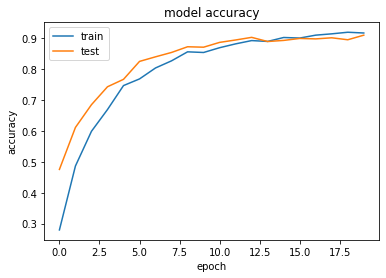

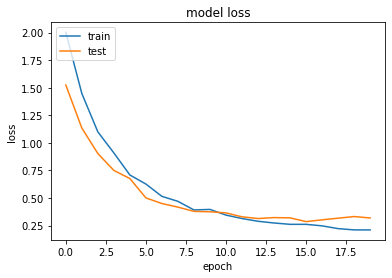

In [201]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [202]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [206]:
y_pred = model.predict(X_test)
print(y_pred)

45/45 [==============================] - 0s 6ms/step
[[3.42638600e-07 6.21681949e-15 9.99999404e-01 ... 6.15469675e-09
  8.29125284e-08 1.92542014e-13]
 [6.97659934e-03 1.43593192e-01 1.07608957e-05 ... 2.12203104e-05
  1.39958260e-03 2.51541933e-05]
 [5.09585334e-06 1.42985864e-05 6.82370213e-04 ... 9.98433173e-01
  1.14191025e-04 5.15329448e-05]
 ...
 [7.02981548e-16 5.40332764e-31 8.29338230e-18 ... 2.05916274e-19
  2.23697865e-15 1.00000000e+00]
 [9.99530673e-01 9.92259629e-06 4.44989069e-04 ... 2.83318343e-07
  8.33803995e-08 5.98515515e-10]
 [2.96274008e-12 3.27756572e-12 1.48993613e-11 ... 1.65968821e-08
  2.64763066e-19 6.76825539e-14]]


In [207]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(display.cm)
             

45/45 [==============================] - 0s 6ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [208]:

print(metrics.classification_report(y_test, y_pred,labels, digits=3))

              precision    recall  f1-score   support

           0      0.973     0.960     0.966       149
           1      0.731     0.726     0.729       135
           2      0.957     1.000     0.978       135
           3      0.845     0.703     0.768       155
           4      0.950     0.985     0.968       136
           5      0.752     0.867     0.805       143
           6      0.950     0.935     0.943       123
           7      0.964     0.978     0.971       137
           8      1.000     0.961     0.980       155
           9      0.986     1.000     0.993       145

    accuracy                          0.910      1413
   macro avg      0.911     0.912     0.910      1413
weighted avg      0.911     0.910     0.909      1413



In [226]:
from sklearn.metrics import confusion_matrix
labels=['bed','blade','box','scissors','shelf','syringe','table','trashbin','trolley','wheelchair']
confusion_matrix(y_test, y_pred,labels)

[2 3 7 ... 9 0 6]


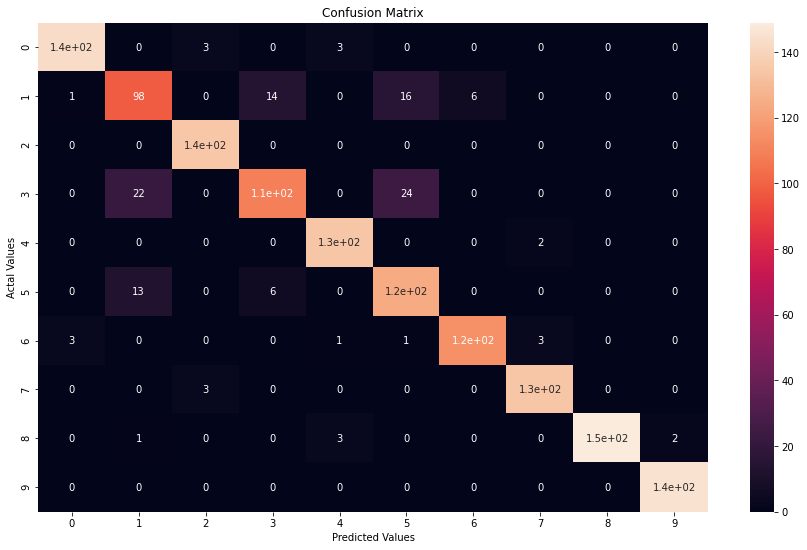

In [222]:
import seaborn as sn

sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


[Text(0, 0.5, 'bed'),
 Text(0, 1.5, 'blade'),
 Text(0, 2.5, 'box'),
 Text(0, 3.5, 'scissors'),
 Text(0, 4.5, 'shelf'),
 Text(0, 5.5, 'syringe'),
 Text(0, 6.5, 'table'),
 Text(0, 7.5, 'trashbin'),
 Text(0, 8.5, 'trolley'),
 Text(0, 9.5, 'wheelchair')]

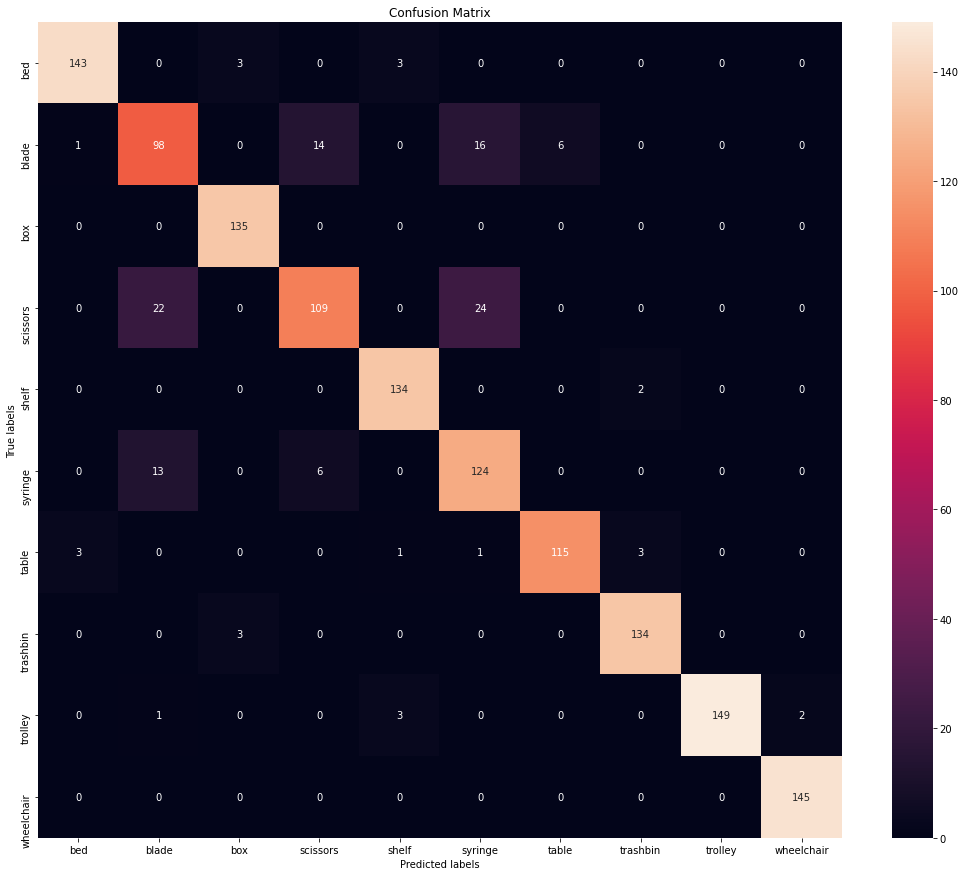

In [233]:
 import seaborn as sns
import matplotlib.pyplot as plt     
plt.figure(figsize=(18,15))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
    #labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['bed','blade','box','scissors','shelf','syringe','table','trashbin','trolley','wheelchair'])
ax.yaxis.set_ticklabels(['bed','blade','box','scissors','shelf','syringe','table','trashbin','trolley','wheelchair'])